# Multi Linear Regression Assignment - Bike Sharing Case Study

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19 and to come up with a mindful business plan to be able to accelerate its revenue.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

**Goal**
1. Model the demand for shared bikes with the available independent variables.
2. Share it with management to understand how exactly the demands vary with different features.
3. Understand the demand dynamics of a new market. 

## Data Understanding, Preparation and EDA

In [938]:
# Importing necessary libs
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove unnecessary warnings
#
import warnings
warnings.filterwarnings('ignore')

In [939]:
# Read the data
#
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Inspection

In [940]:
bike_sharing_df.shape # Consists of 730 rows and 16 columns

(730, 16)

In [941]:
bike_sharing_df.info() # shows the data type of each column with number of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**NOTE**: There are no null values in any column, so no data imputation required

In [942]:
bike_sharing_df.describe() # gives a brief stats of each column

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing Unnecessary Columns

In [943]:
# Column: instant
# Reason: It is just a record index and not a variable
#
bike_sharing_df.drop('instant', axis = 1, inplace = True)

# Column: 'casual', 'registered'
# Reason: Our target variable 'cnt' is a sum of 'casual' and 'registered'.
#         These variables cannot be considered independent and can be removed.
#
bike_sharing_df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [944]:
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Standardization and Segregation

#### Standardize columns

In [945]:
# Column: dteday
# - Since month and year columns are already there, keep only 'day' part of dteday.
# - Rename the column to 'day'.
# - Convert 'day' from string to numeric.
# - After deriving 'day', drop 'dteday'.
#
bike_sharing_df['day'] = pd.to_numeric(bike_sharing_df['dteday'].str.split('-').str[0])
bike_sharing_df.drop('dteday', axis = 1, inplace = True)

#### Standardise precision

In [946]:
# Round large precision values to two decimal places
#
columns = ['temp', 'atemp', 'hum', 'windspeed']

for col in columns:
    bike_sharing_df[columns] = bike_sharing_df[columns].round(2)

#### Numerical to Categorical

In [947]:
# Check number of unique values to determine if any supposed numerical columns can be converted
# to categorical columns.
#
bike_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          489
atemp         521
hum           589
windspeed     426
cnt           695
day            31
dtype: int64

In [948]:
# From the number of unique values above and based on the dictionary description of the column,
# The folloing columns can be converted to Categorical columns with appropriate string values.
#
# Columns: 'season', 'weathersit', 'mnth', 'yr', 'weekday'
# Replace values according to the dictionary
#
bike_sharing_df['season'].replace({ 1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter' }, inplace = True)
bike_sharing_df['yr'].replace({ 0: '2018', 1: '2019' }, inplace = True)
bike_sharing_df['mnth'].replace({ 1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
                                  7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec' }, inplace = True)
bike_sharing_df['weekday'].replace({ 0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat' }, inplace = True)
bike_sharing_df['weathersit'].replace({ 1: 'clear', 2: 'foggy', 3: 'rainy', 4: 'stormy' }, inplace = True)

# Columns: 'holiday', 'workingday'
# Replace values with 'yes' for 1, 'no' for 0
bike_sharing_df['holiday'].replace({ 1: 'yes', 0: 'no' }, inplace = True)
bike_sharing_df['workingday'].replace({ 1: 'yes', 0: 'no' }, inplace = True)

# Check the data
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,jan,no,sat,no,foggy,14.11,18.18,80.58,10.75,985,1
1,spring,2018,jan,no,sun,no,foggy,14.90,17.69,69.61,16.65,801,2
2,spring,2018,jan,no,mon,yes,clear,8.05,9.47,43.73,16.64,1349,3
3,spring,2018,jan,no,tue,yes,clear,8.20,10.61,59.04,10.74,1562,4
4,spring,2018,jan,no,wed,yes,clear,9.31,11.46,43.70,12.52,1600,5


#### Segregate columns into Numerical and Categorical

In [949]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'day', 'cnt']
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Remove Outliers

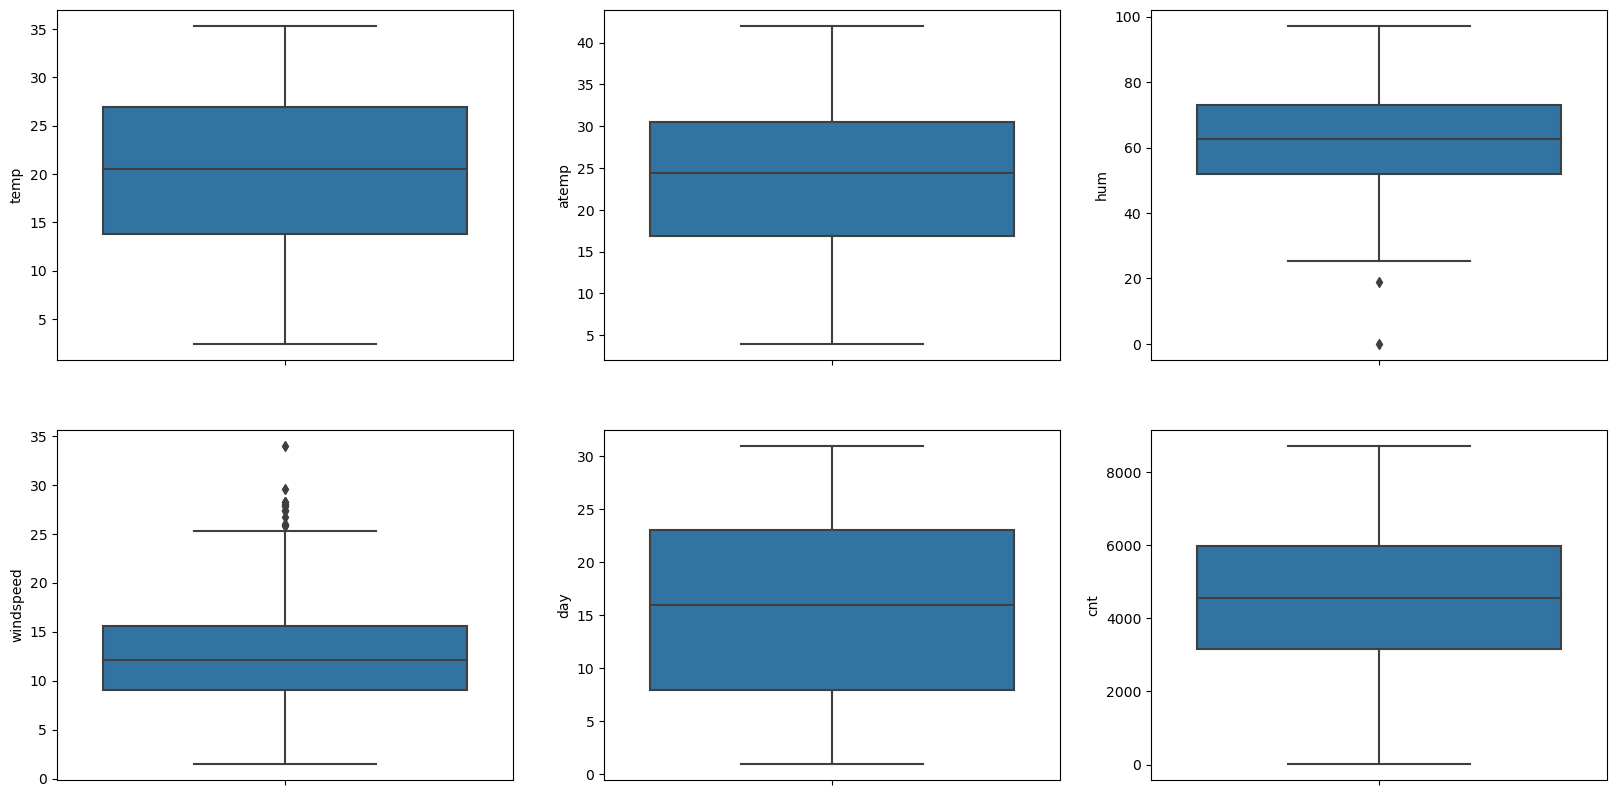

In [950]:
# Plot Box plots for Numerical columns and check for any outliers
#
plt.figure(figsize = (20, 10))

ax = 1
for col in numerical_cols:
    plt.subplot(2, 3, ax)
    sns.boxplot(y = col, data = bike_sharing_df)
    ax += 1

In [951]:
# It seems there are outliers for 'windspeed' and 'hum'.
# We will do the process of removing outliers from these two columns.
#
# Method: Calculate Inter Quantile Range (IQR) and remove all values which are 1.5 times smaller or larger
#.        than the IQR.
#
columns = ['windspeed', 'hum']

Q1 = bike_sharing_df[columns].quantile(0.25)
Q3 = bike_sharing_df[columns].quantile(0.75)
IQR = Q3 - Q1
print("===== Q1: 25% =====")
print(Q1)
print("\n===== Q3: 75% =====")
print(Q3)

original_len = bike_sharing_df.shape[0]
bike_sharing_df = bike_sharing_df[~((bike_sharing_df[columns] < (Q1 - 1.5 * IQR)) |(bike_sharing_df[columns] > (Q3 + 1.5 * IQR))).any(axis = 1)]
new_len = bike_sharing_df.shape[0]
percentage = round((original_len - new_len) / original_len * 100, 2)

print("\n")
print("percentage of rows removed: " + str(percentage) + "%")
print("shape: " + str(bike_sharing_df.shape))

===== Q1: 25% =====
windspeed     9.04
hum          52.00
Name: 0.25, dtype: float64

===== Q3: 75% =====
windspeed    15.6275
hum          72.9900
Name: 0.75, dtype: float64


percentage of rows removed: 1.92%
shape: (716, 13)


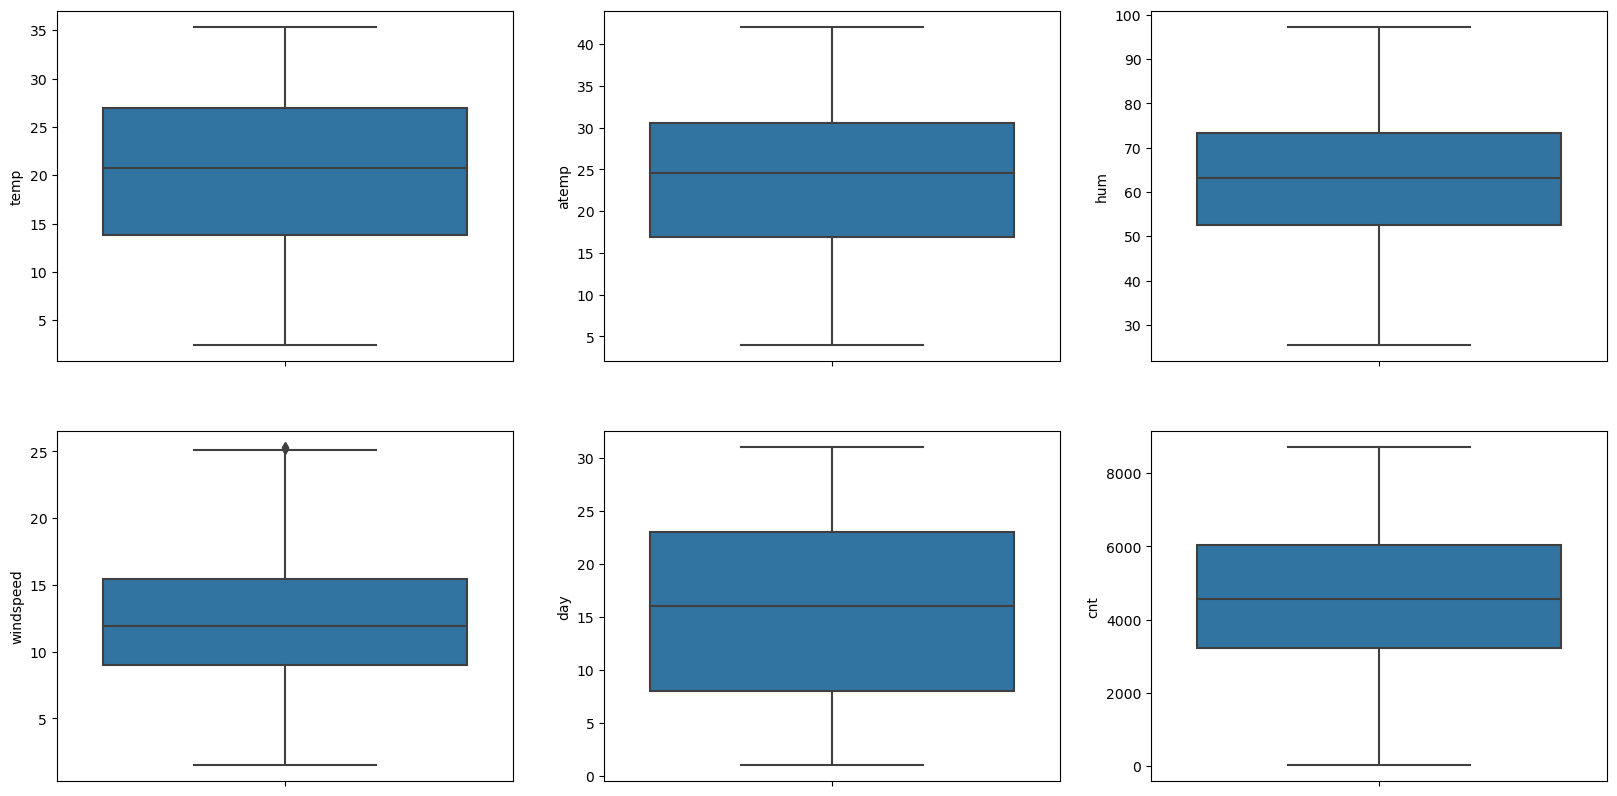

In [952]:
# Reconfirm boxplots after outlier treatment.
#
plt.figure(figsize = (20, 10))

ax = 1
for col in numerical_cols:
    plt.subplot(2, 3, ax)
    sns.boxplot(y = col, data = bike_sharing_df)
    ax += 1
    
# Boxplots look good after outlier treatment.

### Data Visualization

#### Visualizing Numerical variables

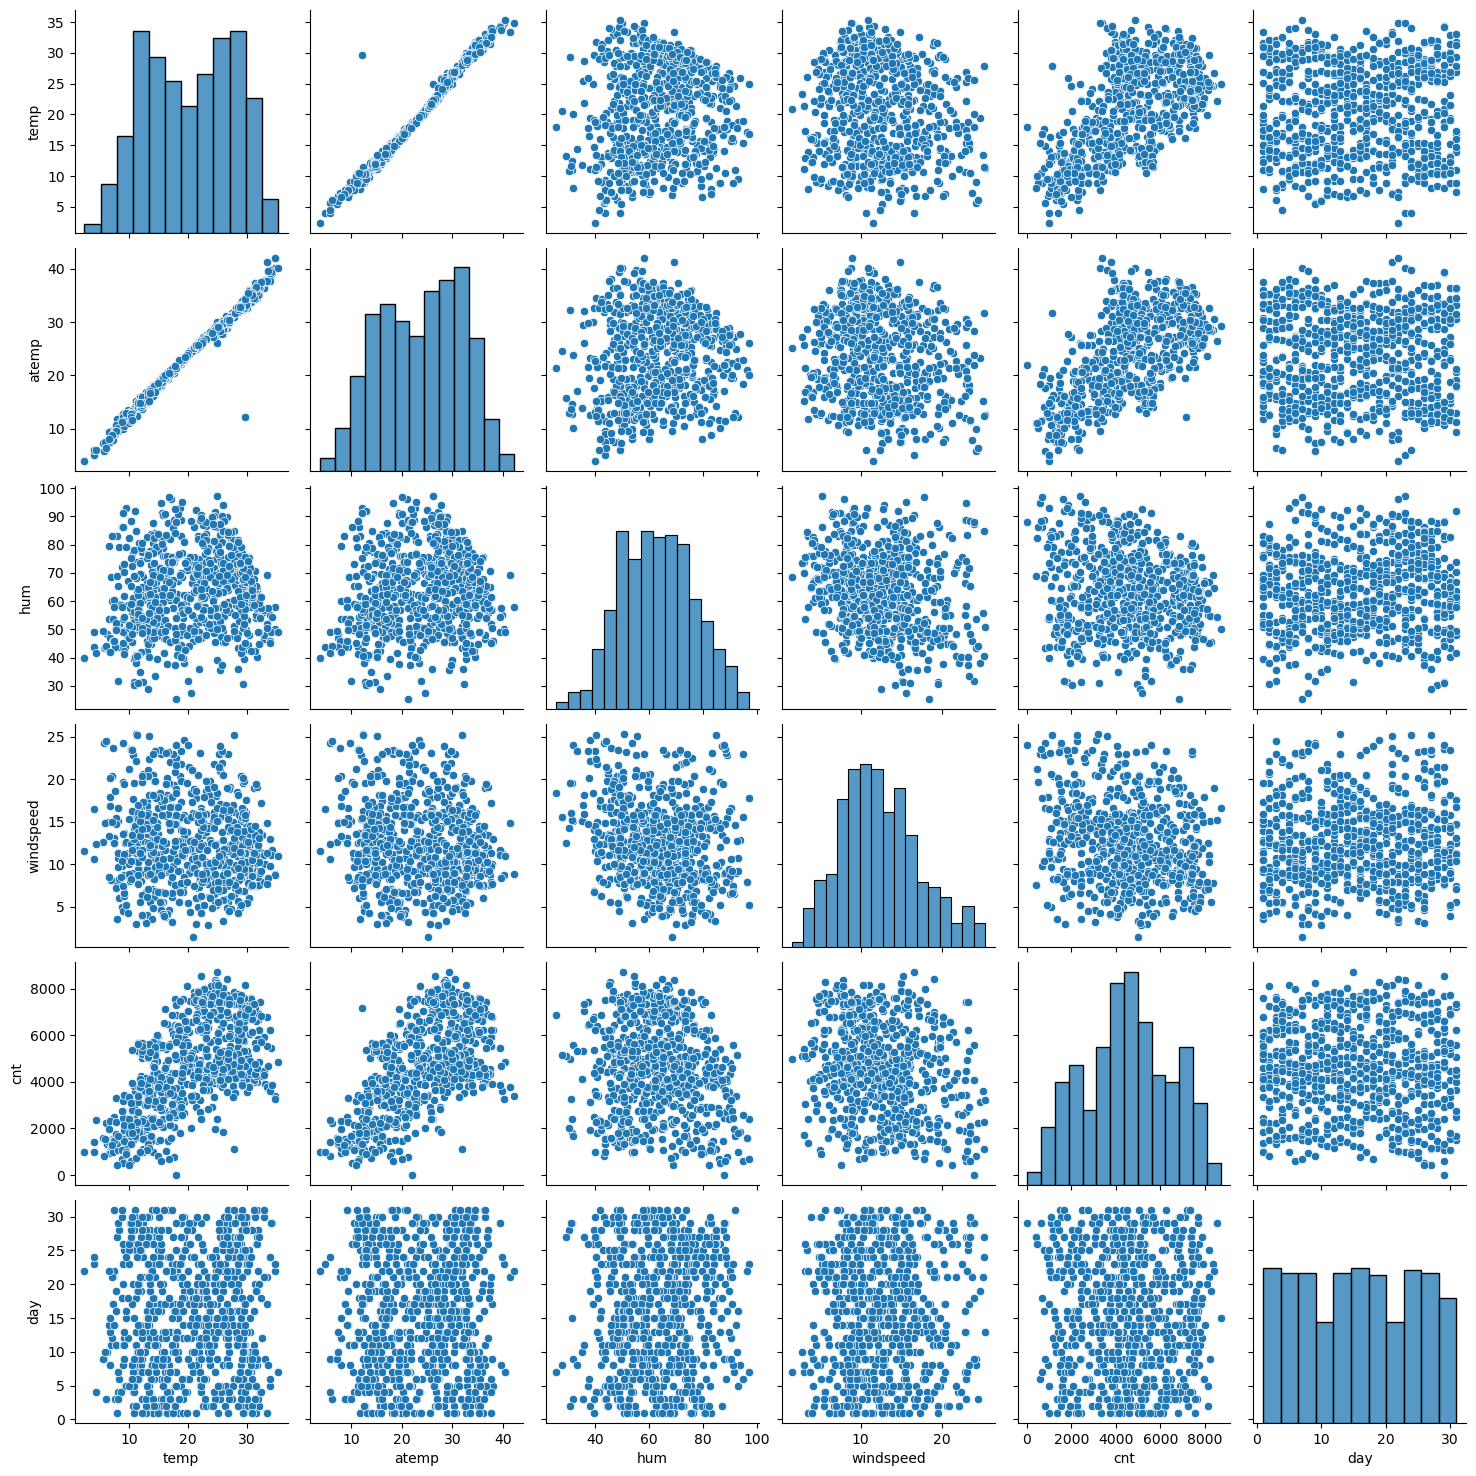

In [953]:
# We will do a scatter plot to see correlation between variables.
# This will also show us multi-colinearity, i.e. correlation between two independent variables.
#
sns.pairplot(bike_sharing_df)
plt.show()

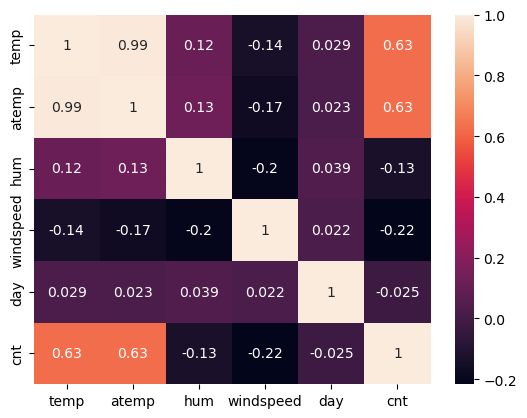

In [954]:
# We will also plot a heat map to have exact correlation values
#
sns.heatmap(bike_sharing_df[numerical_cols].corr(), annot = True)
plt.show()

**Inferences**

From the plots above, we see that
1. Some of the variance in 'cnt' is explained by 'temp', 'atemp' with either a positive or a negative correlation. Hence Linear Regression makes sense.
2. We see that there is almost perfect correlation between 'temp' and 'atemp'. This will result in Multi-colinearity. Hence one of them can be dropped. We will do that during variable selection.
3. There is a negative correlation of demand with humidity and windspeed.
4. There is almost no correlation with the day of the month with demand.

#### Visualizing Categorical variables

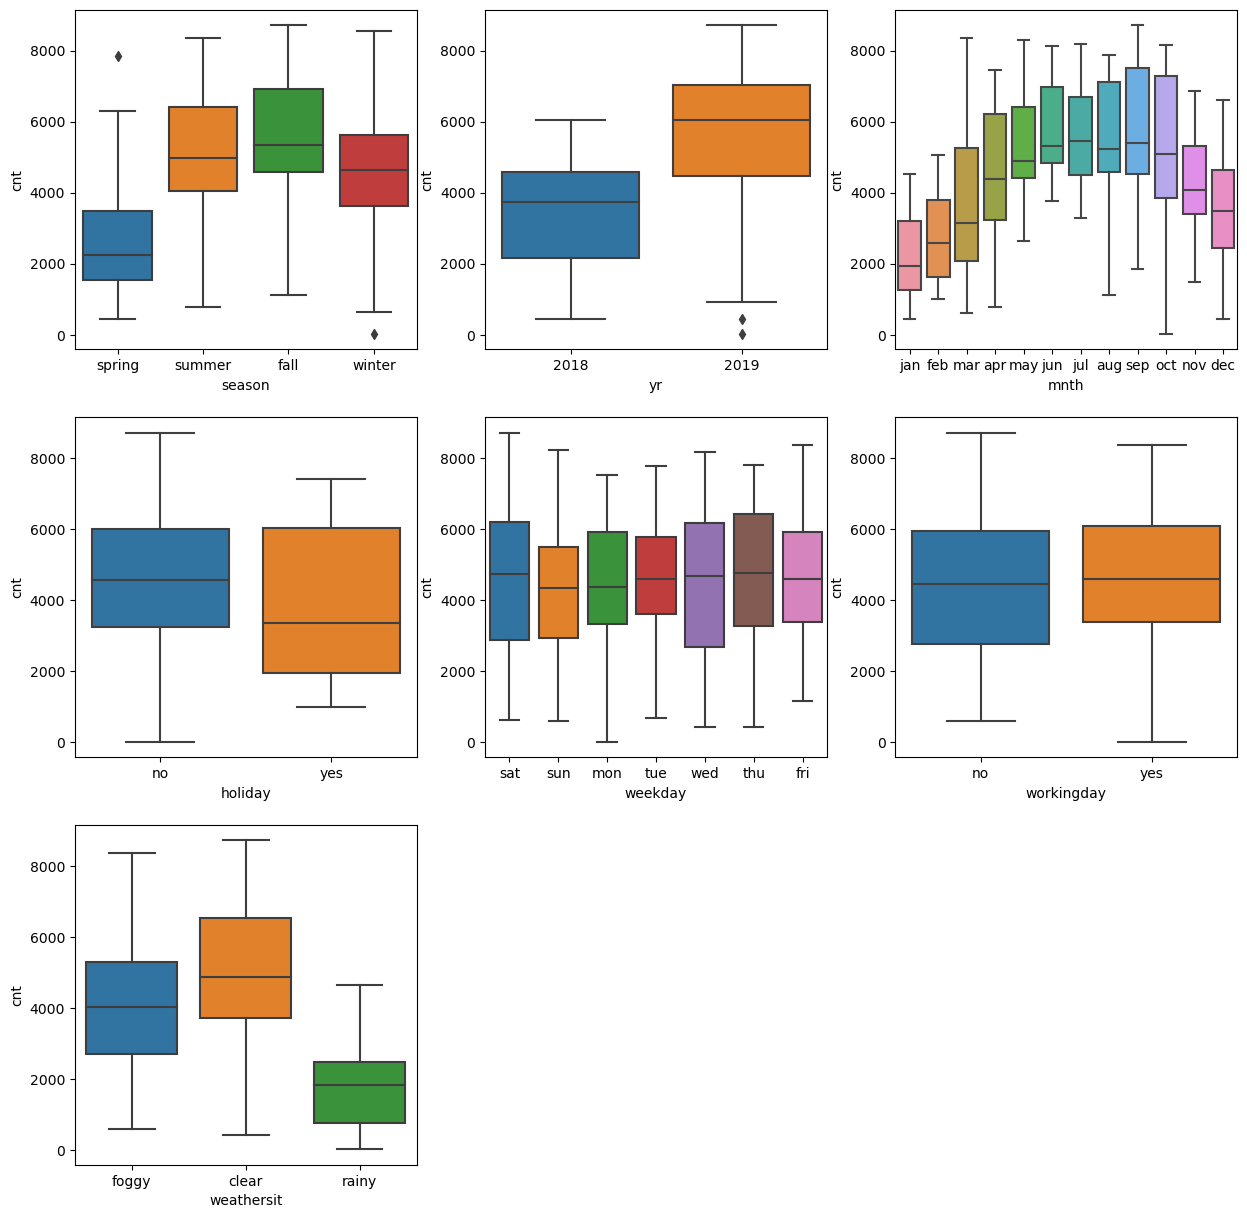

In [955]:
# There are 7 categorical variables
#
plt.figure(figsize = (15, 15))

cnt = 1
for col in categorical_cols:
    plt.subplot(3, 3, cnt)
    sns.boxplot(x = col, y = 'cnt', data = bike_sharing_df)
    cnt += 1

plt.show()

**Inferences**

From the plots above, we see that
1. Summer and Fall seasons show very high demand for rental bikes. Mostly because in these seasons heat is high and bike rides make the wind blow over you which is pleasant.
2. There is a very significant increase in the demand from 2018 to 2019. Mostly because of more awareness of this option.
3. Monthly demand shows increase from Jan to Sep with Sep being the highest. As holidays come by, the demand decreases.
4. Median demand is less on holidays. Probably because these bikes are mostly used for commute.
5. Weekday and Working day don't show much trend.
6. Clear weather has highest demand, for obvious reasons. Rainy day has least demand.

### Data Preparation

#### Creating Dummy Variables

In [956]:
# Before creating dummy variables
#
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,jan,no,sat,no,foggy,14.11,18.18,80.58,10.75,985,1
1,spring,2018,jan,no,sun,no,foggy,14.90,17.69,69.61,16.65,801,2
2,spring,2018,jan,no,mon,yes,clear,8.05,9.47,43.73,16.64,1349,3
3,spring,2018,jan,no,tue,yes,clear,8.20,10.61,59.04,10.74,1562,4
4,spring,2018,jan,no,wed,yes,clear,9.31,11.46,43.70,12.52,1600,5


In [957]:
# Create dummy variables for all categorical variables to make them numeric so as to feed them to the LR model.
# Single values like - weekend, holiday will change to weeked_yes, holiday_yes.
#
# NOTE: Create only n-1 variables for a variable with n values since n-1 can explain all the possible values.
#
bike_sharing_df = pd.get_dummies(data = bike_sharing_df, columns = categorical_cols, drop_first = True, dtype = int)

In [958]:
bike_sharing_df.head()

,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_foggy,weathersit_rainy
0,14.11,18.18,80.58,10.75,985,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.90,17.69,69.61,16.65,801,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.05,9.47,43.73,16.64,1349,3,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.20,10.61,59.04,10.74,1562,4,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,9.31,11.46,43.70,12.52,1600,5,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Model Building and Evaluation

In [959]:
# Import necessary libs
#
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Splitting Train and Test Datasets

In [960]:
df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(501, 31)
(215, 31)


### Rescaling Features

Two types of scaling:
1. Min-Max Scaling - also called Normalization - to scale any date between 0 and 1.
2. Standardization - shift data so that mean is 0 and SD is 1.

We will use **Min-Max** scaling as it will take care of outliers and scale them between 0 and 1.

In [961]:
scaler = MinMaxScaler()

# NOTE: We will only scale numerical variables, since yes/no or 0/1 variables are either or.
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_foggy,weathersit_rainy
728,0.252582,0.204174,0.293056,0.923206,0.204096,0.966667,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
541,0.733646,0.690126,0.126289,0.914394,0.853659,0.833333,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
116,0.719875,0.663902,0.826865,0.814939,0.442936,0.866667,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
718,0.347731,0.342788,0.572923,0.309694,0.472388,0.633333,0,0,1,1,...,0,0,0,0,1,0,0,1,1,0
496,0.648200,0.623227,0.288660,0.283256,0.852163,0.366667,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [962]:
# Verify that min/max values are 0 and 1
#
df_train[numerical_cols].describe()

,temp,atemp,hum,windspeed,day,cnt
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.555920,0.524323,0.519035,0.462028,0.501464,0.519573
std,0.235882,0.218336,0.210210,0.206867,0.297848,0.226255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343349,0.328338,0.363250,0.316408,0.233333,0.358836
50%,0.558372,0.539738,0.520467,0.431809,0.500000,0.522434
75%,0.766823,0.707787,0.674045,0.585816,0.766667,0.692706
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

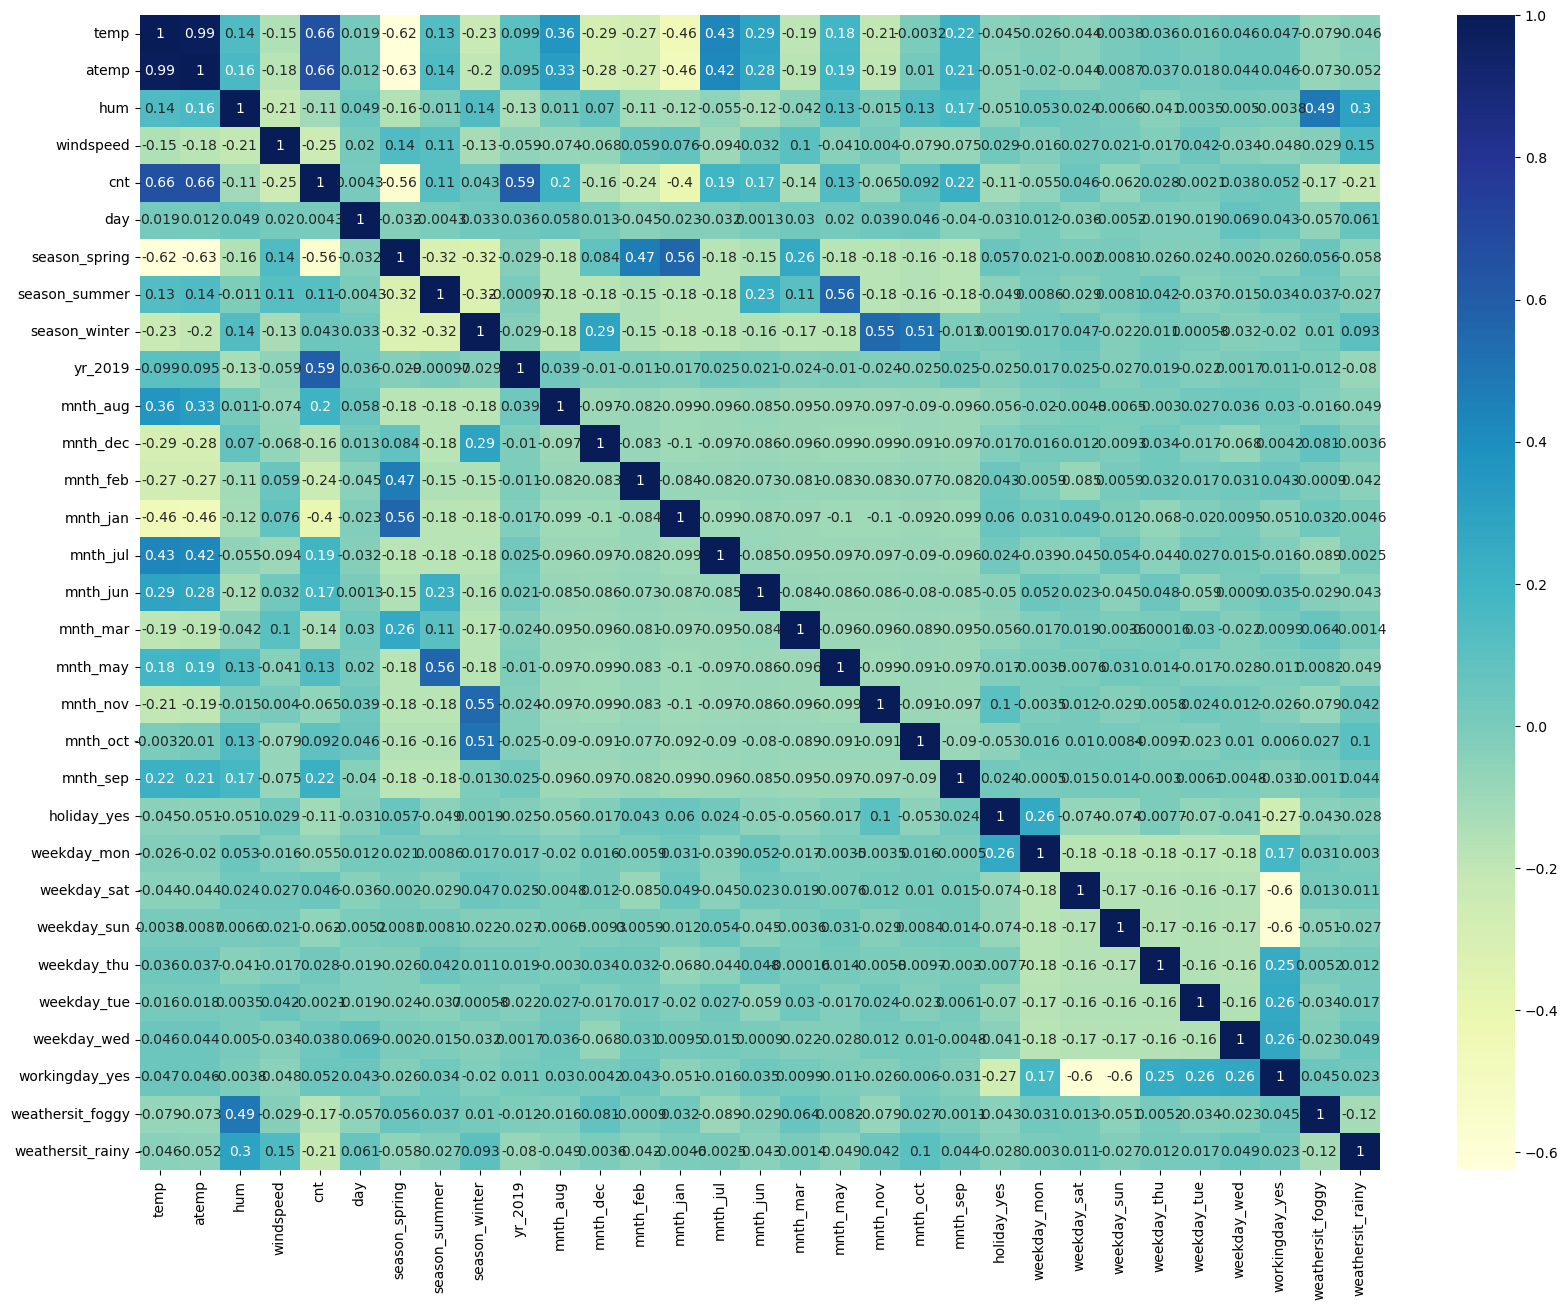

In [963]:
# Lets first plot the correlation between all the variables using a heatmap
#
plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

These are the variables with high correlation with our target variable:
`temp`, `atemp`, `year`, `mnth_aug`, `mnth_sep`

In [964]:
# Setting up X_train and y_train
#
# Remove the target variable from the list and set it as y_train
y_train = df_train.pop('cnt')
# Keep rest of the columns as X_train
X_train = df_train

### Building the Model

Since our dataset has more than 15 columns, we will use RFE to get an initial list of variables and then perform manual elimination to tune the model.

#### Recursive Feature Elimination (RFE)

In [965]:
# Import necessary libs
#
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [966]:
# Running RFE with output variables = 15
#
lm = LinearRegression()
lm.fit(X_train, y_train)

# Runnning RFE
#
rfe = RFE(lm, n_features_to_select = 15, step = 1)
rfe = rfe.fit(X_train, y_train)

In [967]:
# Variables selected by the RFE
#
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 11),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 16),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 5),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 9),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 8),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('workingday_yes', False, 4),
 ('weathersit_foggy', False, 2),
 ('weathersit_rainy', True, 1)]

In [968]:
# Selecting only those columns where RFE support is True
#
cols = X_train.columns[rfe.support_]
print(cols)

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_nov',
       'mnth_sep', 'holiday_yes', 'weathersit_rainy'],
      dtype='object')


In [969]:
# Columns which RFE did NOT select
X_train.columns[~rfe.support_]

Index(['day', 'season_summer', 'mnth_aug', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'workingday_yes', 'weathersit_foggy'],
      dtype='object')

#### Manual Elimination

We will use `statsmodel` API to look at detailed summary, analyze and remove unnecessary variables.

In [970]:
# Import necessary libs
#
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Build necessary functions

In [971]:
# Functions to quickly build a model with given columns and print detailed summary
#
def model_summary_with(cols):
    # Create training dataset with given columns
    X_train_sm = X_train[cols]
    # Adding a constant to the training dataset since 2D variable is supported by sm OLS
    X_train_sm = sm.add_constant(X_train_sm)
    # Fit the model
    lm = sm.OLS(y_train, X_train_sm).fit()
    # Print summary
    print(lm.summary())
    
    # We return the model back so it can be used further if necessary
    return lm, X_train_sm
    
def print_vifs_for(cols):
    X_train_vif = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)

##### Model 1: using RFE selected columns

In [972]:
cols = X_train.columns[rfe.support_]

model_summary_with(cols)
print_vifs_for(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          2.67e-187
Time:                        22:09:22   Log-Likelihood:                 506.00
No. Observations:                 501   AIC:                            -980.0
Df Residuals:                     485   BIC:                            -912.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3457      0.028  

From the above values we see
1. `temp` and `atemp` with very high and almost similar VIF values. (because of multi-colinearity)
2. Also, `p-value` for `atemp` his quite higher than `temp`.

Hence, we will **drop** `atemp` and recalculate the model. Since removing a variable with high p-value is anyway necessary, dropping it will change the VIF of other variables.

##### Model 2: Dropping 'atemp'

In [973]:
# Dropping 'atemp' and recalculating the model.
cols = cols.drop('atemp')
# Verify
print(cols)

model_summary_with(cols)
print_vifs_for(cols)

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'holiday_yes', 'weathersit_rainy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          2.61e-188
Time:                        22:09:22   Log-Likelihood:                 505.67
No. Observations:                 501   AIC:                            -981.3
Df Residuals:                     486   BIC:                            -918.1
Df Model:                          14                                         
Covariance Type:            nonrobust                            

We see that VIF for `temp` dropped significantly. Also, out R-sq did not change much. Hence it was a right call to drop 'atemp' and it was a clear case of multi-colinearity.

Now we see `temp` and `hum` have similar VIF values and almost 0 `p-values`. But since coeff of `hum` is negative, and its magnitude is less than `temp`, we will drop that first.

##### Model 3: Dropping 'hum'

In [974]:
# Dropping 'hum' and recalculating the model.
cols = cols.drop('hum')
# Verify
print(cols)

model_summary_with(cols)
print_vifs_for(cols)

Index(['temp', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'holiday_yes', 'weathersit_rainy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.56e-173
Time:                        22:09:22   Log-Likelihood:                 467.73
No. Observations:                 501   AIC:                            -907.5
Df Residuals:                     487   BIC:                            -848.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                   

Now `p-value` for `mnth_may` and `mnth_feb` are high. Hence we will drop these next.

##### Model 4: Dropping `mnth_may` and `mnth_feb`

In [975]:
# Dropping 'workingday_yes' and recalculating the model.
cols = cols.drop(['mnth_feb', 'mnth_may'])

lr_model, X_train_sm = model_summary_with(cols)
print_vifs_for(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          6.68e-175
Time:                        22:09:22   Log-Likelihood:                 465.49
No. Observations:                 501   AIC:                            -907.0
Df Residuals:                     489   BIC:                            -856.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2563      0.027  

Now we have
1. All `p-value` below 0.05
2. All VIF values below 5
3. Adj R-sq value of 0.817 - which is very good.

Hence we can see the 81.7 % variance in `cnt` is explained by the above 9 variables. We will keep **this model as final**.

### Resudal Analysis

In [976]:
# List the coeffs of all the params in the model
#
lr_model.params

const               0.256257
temp                0.381361
windspeed          -0.089568
season_spring      -0.107867
season_winter       0.075526
yr_2019             0.238320
mnth_dec           -0.066306
mnth_jan           -0.056845
mnth_nov           -0.063982
mnth_sep            0.056689
holiday_yes        -0.071736
weathersit_rainy   -0.246861
dtype: float64

In [977]:
# Calculate predicted y values for training dataset
#
y_train_pred = lr_model.predict(X_train_sm)

##### Residual distribution

<Axes: ylabel='Density'>

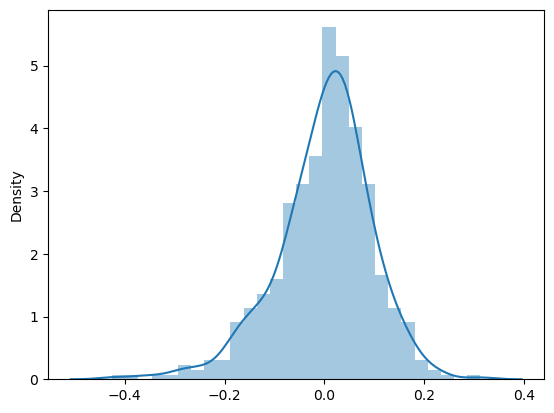

In [978]:
# Plot the distribution of residuals
#
res = y_train - y_train_pred
sns.distplot(res)

**NOTE**: Here we can clearly see that the distribution of Error terms:
1. Is centered around 0.
2. Is normally distributed.

##### Residual pattern

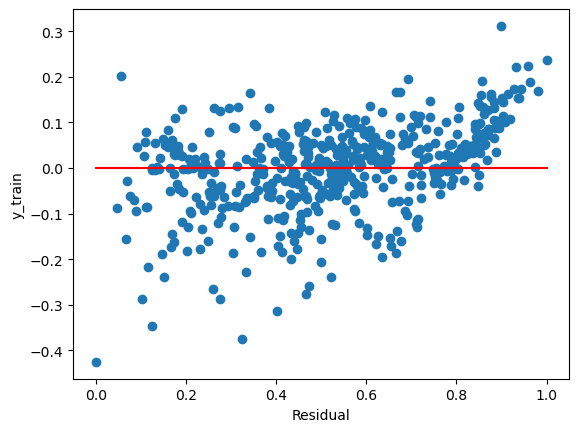

In [979]:
# NOTE: We should not be able to find any pattern in residuals
#
plt.scatter(y_train, res)
# plot the 0 line for checking the distribution around it.
plt.plot(y_train, y_train - y_train, 'r')
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

**Observations**:
1. We do not see any visible patterns in Residual distribution.
2. Residuals are distributed on both sides of y = 0 line.

Hence, the model is good enough.

### Model Prediction

We will now use our final model to predict values for the test dataset. What we want make sure is:
1. To have similar Adj R-sq value for test as we got for the training dataset.
2. There should not be much difference

In [980]:
# Summary of the training model
#
lr_model.summary()

# We want our test model to have Adj R-sq value of around 0.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          6.68e-175
Time:                        22:09:22   Log-Likelihood:                 465.49
No. Observations:                 501   AIC:                            -907.0
Df Residuals:                     489   BIC:                            -856.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2563      0.027      9.541      0.000       0.203       0.309
temp                 0.3814      0.031     12.190      0.000       0.320       0.443
windspeed           -0.0896      0.022     -4.090      0.000      -0.133      -0.047
season_spring       -0.1079      0.017     -6.347      0.000      -0.141      -0.074
season_winter        0.0755      0.015      4.966      0.000       0.046       0.105
yr_2019              0.2383      0.009     27.296      0.000       0.221       0.255
mnth_dec            -0.0663      0.018     -3.643      0.000      -0.102      -0.031
mnth_jan            -0.0568      0.019     -2.963      0.003      -0.095      -0.019
mnth_nov            -0.0640      0.020     -3.179      0.002      -0.104      -0.024
mnth_sep             0.0567      0.016      3.578      0.000       0.026       0.088
holiday_yes         -0.0717      0.025     -2.882      0.004      -0.121      -0.023
weathersit_rainy    -0.2469      0.029     -8.519      0.000      -0.304      -0.190
==============================================================================
Omnibus:                       55.804   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.710
Skew:                          -0.700   Prob(JB):                     1.65e-21
Kurtosis:                       4.619   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Scale test dataset

In [981]:
# We need to scale test dataset inorder to correctly predict the data from our model.
# This is done because all the coefficients of our model are on a scaled dataset from 0 to 1.
# So test dataset has to be scaled to the same values.
#
# We never use fit on the test data, since fit calculates min/max and other values for scaling
# This is done because in real world scenario, test data is unseen data. So techically we cannot use
# any preprocessing on it.
#
# So we will use the scaling values determined by fit from the training dataset and transform the test dataset
# using the training fit values.
#
# NOTE: We already have scaler fit on training dataset. Now it just needs to transform the test dataset.
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])
df_test.head()

,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_foggy,weathersit_rainy
583,0.868545,0.827669,0.627350,0.265632,0.834215,0.200000,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
493,0.662285,0.634199,0.688599,0.545531,0.540152,0.266667,0,1,0,1,...,0,0,0,0,0,0,1,1,1,0
294,0.466354,0.463473,0.514251,0.197650,0.493097,0.700000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
157,0.832238,0.772010,0.466798,0.464960,0.553497,0.200000,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
670,0.379969,0.370618,0.351880,0.685271,0.670156,0.033333,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [982]:
df_test.describe()

# NOTE: Here min/max values can be < 0 or > 1 since the scaler has been fit on training dataset.

,temp,atemp,hum,windspeed,cnt,day,season_spring,season_summer,season_winter,yr_2019,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_foggy,weathersit_rainy
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.578759,0.549064,0.513805,0.458092,0.518992,0.465581,0.232558,0.279070,0.246512,0.483721,...,0.023256,0.102326,0.144186,0.144186,0.144186,0.176744,0.144186,0.688372,0.279070,0.037209
std,0.234981,0.217917,0.213243,0.190487,0.213323,0.284278,0.423449,0.449589,0.431986,0.500901,...,0.151067,0.303783,0.352098,0.352098,0.352098,0.382342,0.352098,0.464240,0.449589,0.189716
min,0.048200,0.026492,-0.054275,0.055812,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379343,0.372759,0.345209,0.308645,0.374655,0.233333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.605321,0.586834,0.503487,0.447755,0.525081,0.466667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.771205,0.719160,0.666465,0.577004,0.671767,0.700000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.030047,1.019267,1.034718,0.914394,0.951680,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Build test dataset

In [983]:
y_test = df_test.pop('cnt')
X_test = df_test

# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,temp,atemp,hum,windspeed,day,season_spring,season_summer,season_winter,yr_2019,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_foggy,weathersit_rainy
583,1.0,0.868545,0.827669,0.627350,0.265632,0.200000,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
493,1.0,0.662285,0.634199,0.688599,0.545531,0.266667,0,1,0,1,...,0,0,0,0,0,0,1,1,1,0
294,1.0,0.466354,0.463473,0.514251,0.197650,0.700000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
157,1.0,0.832238,0.772010,0.466798,0.464960,0.200000,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
670,1.0,0.379969,0.370618,0.351880,0.685271,0.033333,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [984]:
# Keep only those columns which are part of our LR model
#
model_cols = X_train_sm.columns.tolist()
X_test_sm = X_test_sm[model_cols]
X_test_sm.head()

,const,temp,windspeed,season_spring,season_winter,yr_2019,mnth_dec,mnth_jan,mnth_nov,mnth_sep,holiday_yes,weathersit_rainy
583,1.0,0.868545,0.265632,0,0,1,0,0,0,0,0,0
493,1.0,0.662285,0.545531,0,0,1,0,0,0,0,0,0
294,1.0,0.466354,0.197650,0,1,0,0,0,0,0,0,0
157,1.0,0.832238,0.464960,0,0,0,0,0,0,0,0,0
670,1.0,0.379969,0.685271,0,1,1,0,0,1,0,0,0


##### Predict

In [985]:
y_test_pred = lr_model.predict(X_test_sm)

##### Evaluate

In [986]:
# Calculating R-sq between Test and Predicted target values
#
# Importing necessary libs
from sklearn.metrics import r2_score

# R-sq
r2_score(y_test, y_test_pred)

0.7564912139140413

##### Visualize

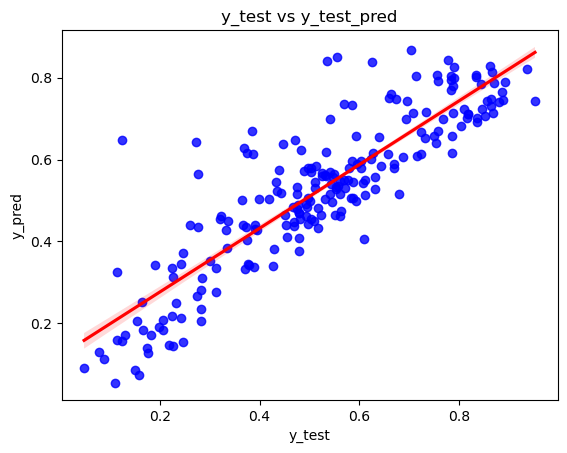

In [987]:
plt.figure()
sns.regplot(x = y_test, y = y_test_pred, ci = 68, fit_reg = True, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

##### Compare

**Observations:**
1. Train dataset R-sq: 0.821
2. Test dataset R-sq: 0.756

**Inference:**
There is some decrease in R-sq on predicted values, but it is not that significant. Test dataset R-sq is 0.756 which is still very good. Hence, we can say that our model accounts for 75.6% of variance and is a good fit.

**What can we do further:**
1. Add new features - probably derived features.
2. Try a non-linear approach.

##### Equation

Count = 0.3814 * *temp* - 0.0896 * *windspeed* - 0.1079 * *season_spring* + 0.0755 * *season_winter* + 0.2383 * *yr_2019* - 0.0663 * *mnth_dec* - 0.0568 * *mnth_jan* - 0.0640 * *mnth_nov* + 0.0567 * *mnth_sep* - 0.0717 * *holiday_yes* - 0.2469 * *weathersit_rainy*

**NOTE:** As seen, some coefficients are negative, they show an inverse relation with the target variable

##### Conclusions

1. Highest positively affecting variable is 'temp'.
2. Company should expand in Winter instead of Spring Season as the coefficient for Spring is negative.
3. Company should avoid Nov, Dec and Jan months for expansion.
4. Company should avoid Rainy weather and Holidays.
5. Company should increase expansion every year since year 2019 coefficient is very high.